In [1]:
import numpy as numpy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Input data
x=df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

# Output
y=df['Exited']

In [6]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<Axes: xlabel='Exited', ylabel='count'>

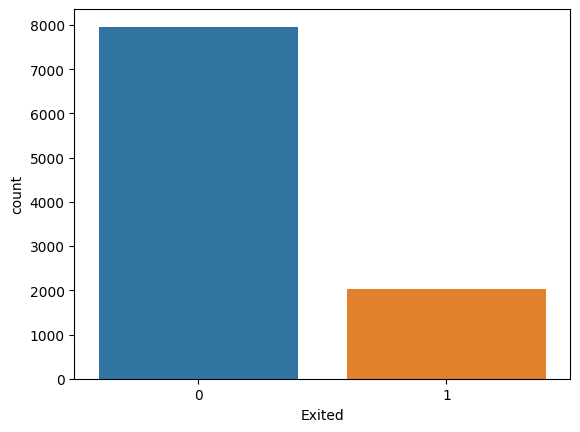

In [7]:
import seaborn as sns
sns.countplot(x=y)

In [8]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
# point of improvement 
# from the above graph we can see the graph is immbalance
# we need to balance it
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from imblearn.over_sampling import RandomOverSampler


In [11]:
ros=RandomOverSampler(random_state=0)

In [12]:
x_res,y_res=ros.fit_resample(x,y)

In [13]:
#  Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,random_state=42,test_size=0.4)

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [17]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [18]:
predict=ann.predict(x_test)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score


In [20]:
y_test.value_counts()

0    3190
1     810
Name: Exited, dtype: int64

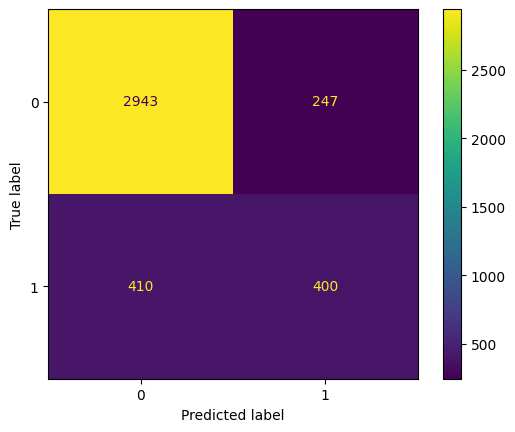

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,predict)

In [22]:
accuracy_score(y_test,predict)

0.83575

In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3190
           1       0.62      0.49      0.55       810

    accuracy                           0.84      4000
   macro avg       0.75      0.71      0.72      4000
weighted avg       0.83      0.84      0.83      4000



In [24]:
confusion_matrix(y_test,predict)


array([[2943,  247],
       [ 410,  400]], dtype=int64)